# Predicting Housing Sale Prices in Ames, Iowa

----




### Project Description
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, our goal is to predict the final price of each home of the test data set using the training data set.


### Research Question
What housing characteristics affect the price of a home most significantly?

Ho: The following housing characteristics have no effect on housing prices in Ames, Iowa.

* Year remodeled
* Lot area
* Living area sq ft
* Total basement sq ft
* Overall quality 

Ha: The above housing characteristics have an effect on housing prices in Ames, Iowa.

### Datasets

80 Columns x 1460 Rows of housing sales data from years 2006 to 2010

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


----

### Contents
1. Data Observation
    * Sales Price Distributions (Histograms)
    * 5 house features (from research question) vs. Sales price plots
    * 79 house features vs. Sales price plots
2. Data Munging/Cleaning
3. Data Analysis
4. Predictive Model Construction
5. Discussion and Conclusion

In [72]:
# Dependencies and Setup
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats


##### * Initial Observation
* 35 Numerical Columns
* 44 Categorical Columns

##### * Our selection of variables to analyze


are TELL US WHY
#### * Observations of the 5 housing features (from research question)

#### 5 Housing features and their description
1. Overall Quality: overall quality of materials/finish of the house (1-10 Rating Scale)

2. YearRemodAdd: the year the house was remodeled if no remodelling was performed then it is the same as year the house was built (YYYY)

3. TotalBsmtSF: total area of basement area (sqft)

4. GrLivArea: total area of livable (above ground) area (sqft)

5. LotArea: Lot size (sqft)


In [64]:
# Importing Data
data = pd.read_csv("train.csv")

# Model Data 5 house features
model_data = pd.DataFrame()
model_data["overallqual"] = data["OverallQual"]
model_data["yearremodadd"] = data["YearRemodAdd"]
model_data["totalbsmtsf"] = data["TotalBsmtSF"]
model_data["grlivarea"] = data["GrLivArea"]
model_data["lotarea"] = data["LotArea"] 
model_data["saleprice"] = data["SalePrice"]
model_data["ln_saleprice"] = np.log(data["SalePrice"])

# Initial observation of data
print(model_data.describe())

       overallqual  yearremodadd  totalbsmtsf    grlivarea        lotarea  \
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000   
mean      6.099315   1984.865753  1057.429452  1515.463699   10516.828082   
std       1.382997     20.645407   438.705324   525.480383    9981.264932   
min       1.000000   1950.000000     0.000000   334.000000    1300.000000   
25%       5.000000   1967.000000   795.750000  1129.500000    7553.500000   
50%       6.000000   1994.000000   991.500000  1464.000000    9478.500000   
75%       7.000000   2004.000000  1298.250000  1776.750000   11601.500000   
max      10.000000   2010.000000  6110.000000  5642.000000  215245.000000   

           saleprice  ln_saleprice  
count    1460.000000   1460.000000  
mean   180921.195890     12.024051  
std     79442.502883      0.399452  
min     34900.000000     10.460242  
25%    129975.000000     11.775097  
50%    163000.000000     12.001505  
75%    214000.000000     12.273731  
max    755

In [65]:
# Na / NaN searching
model_data_na = (model_data.isnull().sum() / len(model_data)) * 100
model_data_na = model_data_na.drop(model_data_na[model_data_na == 0].index).sort_values(ascending=False)[:79]
model_data_na_percentage = pd.DataFrame({'Missing %' : model_data_na})

# output % of data missing / column

model_data_na_percentage.head(10)


,Missing %


#### 1. Data Observation of Sales Prices Distributions
----

##### * Histograms
* Sales Price vs. Frequency 
* Natural Log of Sales Price vs. Frequency

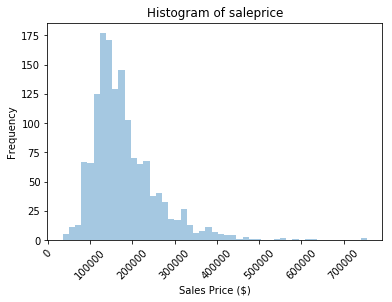

In [66]:
# Plot Histogram of Sales Price vs. Frequency
target = "saleprice"
sns.distplot(model_data[target], kde= False)

# Histogram labeling/formatting
plt.xticks(rotation = 45)
plt.title("Histogram of " + target)
plt.xlabel("Sales Price ($)")
plt.ylabel("Frequency")
plt.show()

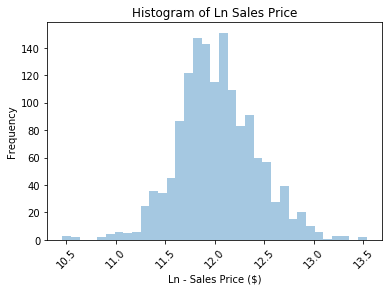

In [67]:
# Historgram of Natural Log of SalePrice
target = "ln_saleprice"
sns.distplot(model_data[target], kde= False)

# Histogram labeling/formatting
plt.xticks(rotation = 45)
plt.title("Histogram of Ln Sales Price")
plt.xlabel("Ln - Sales Price ($)")
plt.ylabel("Frequency")
plt.show()

# ONE WAY PLOTS

descriptions

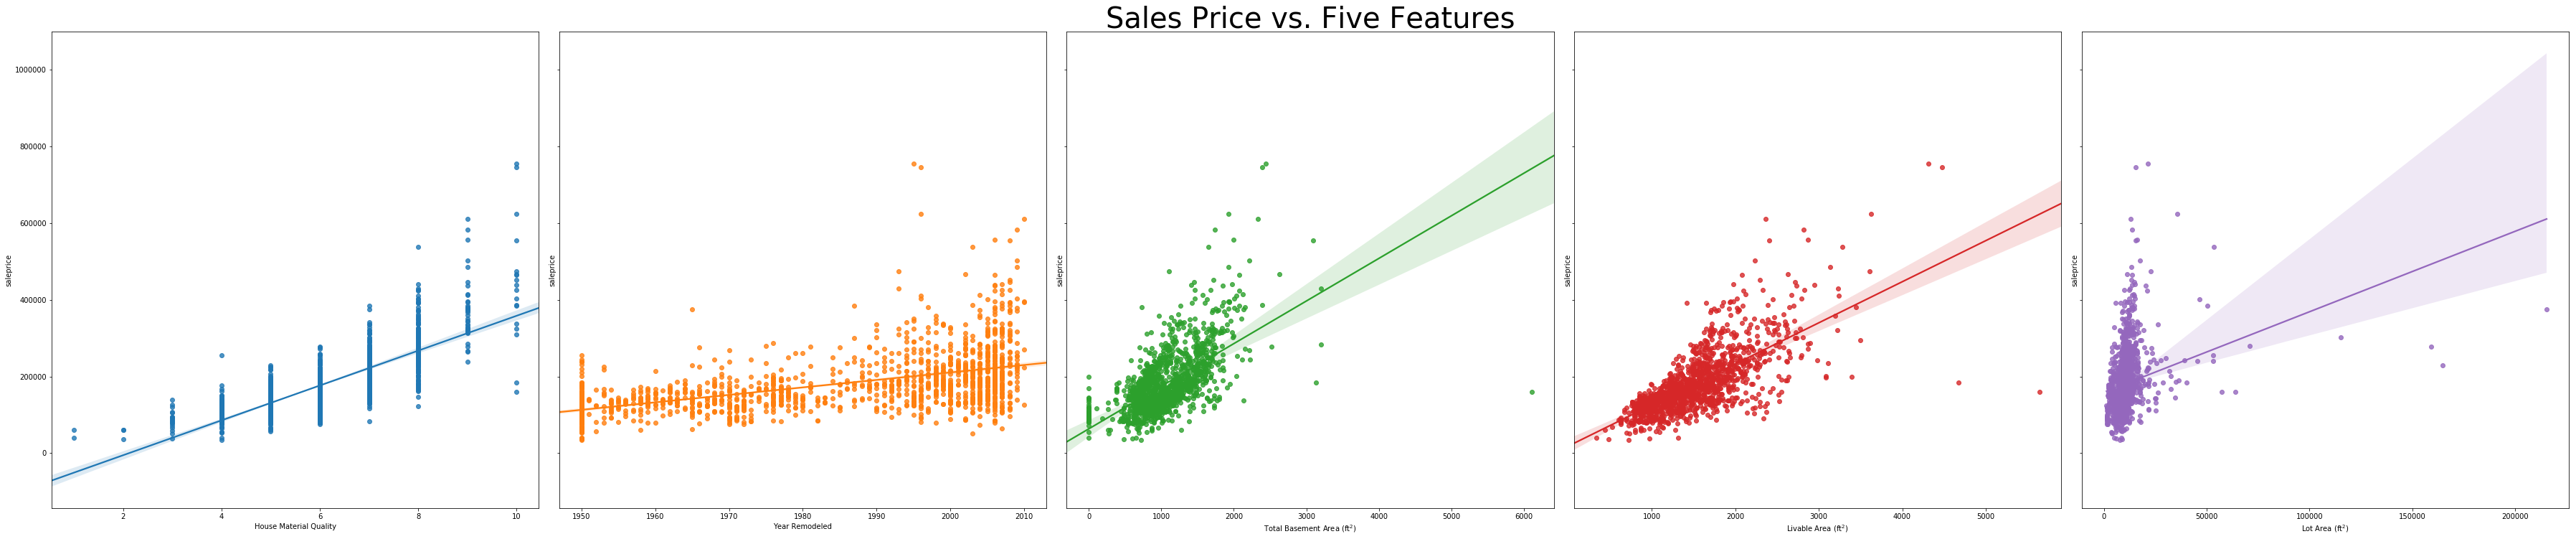

In [68]:
# Oneway plots of field vs. Sales Price
target = "saleprice"

# Isolating housing features relevant to Hypothesis
field1 = model_data.columns[0] # OverallQual: overall quality of materials/finish of house (1-10 rating)
field2 = model_data.columns[1] # YearRemodAdd: year remodeled
field3 = model_data.columns[2] # TotalBsmtSF: total basement area (sqft)
field4 = model_data.columns[3] # GrLivArea: livable area (sqft)
field5 = model_data.columns[4] # LotArea: lot area (sqft)

# Preparing X-Y for one-way plots
oneway1 = model_data[[field1,target]]
oneway2 = model_data[[field2,target]]
oneway3 = model_data[[field3,target]]
oneway4 = model_data[[field4,target]]
oneway5 = model_data[[field5,target]]

# Ploting 
oneway = [field1,field2,field3,field4,field5]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, nrows=1, figsize=(50,10),sharey = True)

sns.regplot(oneway1[field1], oneway1[target], ax = ax1)
sns.regplot(oneway2[field2], oneway2[target], ax = ax2)
sns.regplot(oneway3[field3], oneway3[target], ax = ax3)
sns.regplot(oneway4[field4], oneway4[target], ax = ax4)
sns.regplot(oneway5[field5], oneway5[target], ax = ax5, truncate = True)
plt.tight_layout()

# Plot axis labels and title
ax1.set_xlabel("House Material Quality")
ax2.set_xlabel("Year Remodeled")
ax3.set_xlabel("Total Basement Area (ft$^2$)")
ax4.set_xlabel("Livable Area (ft$^2$)")
ax5.set_xlabel("Lot Area (ft$^2$)")
ax3.set_title("Sales Price vs. Five Features",fontsize = 40)

# Saving plots of 5 features vs. sales price
plt.savefig("5plot.png")
plt.show()

In [70]:
# Nomalize data
model_data = (model_data-model_data.mean()) / (model_data.max() - model_data.min())
print(model_data.describe())

# Create formula (form1) for use in linear models
a = model_data.columns[0]
b = model_data.columns[1]
c = model_data.columns[2]
d = model_data.columns[3]
e = model_data.columns[4]

# Formula 1 construction and string verification of house features involved
form1 = "saleprice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
form2 = "ln_saleprice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
form1

        overallqual  yearremodadd   totalbsmtsf     grlivarea       lotarea  \
count  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean   1.946692e-17  1.541119e-15  1.927206e-17 -1.614006e-17 -4.281262e-18   
std    1.536663e-01  3.440901e-01  7.180120e-02  9.899781e-02  4.665342e-02   
min   -5.665906e-01 -5.810959e-01 -1.730654e-01 -2.225817e-01 -4.308036e-02   
25%   -1.221461e-01 -2.977626e-01 -4.282806e-02 -7.271358e-02 -1.385089e-02   
50%   -1.103501e-02  1.522374e-01 -1.079042e-02 -9.695497e-03 -4.853248e-03   
75%    1.000761e-01  3.189041e-01  3.941416e-02  4.922500e-02  5.069863e-03   
max    4.334094e-01  4.189041e-01  8.269346e-01  7.774183e-01  9.569196e-01   

          saleprice  ln_saleprice  
count  1.460000e+03  1.460000e+03  
mean   1.520853e-17  3.219813e-15  
std    1.103215e-01  1.299355e-01  
min   -2.027791e-01 -5.086829e-01  
25%   -7.074878e-02 -8.098076e-02  
50%   -2.488709e-02 -7.333679e-03  
75%    4.593640e-02  8.121719e-02  


'saleprice ~ overallqual + yearremodadd + totalbsmtsf + grlivarea + lotarea'

In [78]:
# Ordinary Least Squares Model (Special Case of GLM)

# Sale Price Fit
model_ols = smf.ols(formula = form1, data = model_data).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     917.5
Date:                Sat, 27 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:47:05   Log-Likelihood:                 2187.0
No. Observations:                1460   AIC:                            -4362.
Df Residuals:                    1454   BIC:                            -4330.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.437e-17      0.001   1.01e-14   

In [ ]:
# Ordinary Least Squares Model (Special Case of GLM)

# Natural Log of Sale Price Fit
model_ols = smf.ols(formula = form2, data = model_data).fit()
print(model_ols.summary())

# Appendix

#### * Observations of all 79 house features

Why not observe all 79 house features' effects on sales prices? 

In [7]:
# Dealing with categorical data

# Import data to convert text fields to categorical fields
data1 = pd.read_csv("train.csv")
data1["ln_SalePrice"] = np.log(data1["SalePrice"])
obj_list = data1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
le = LabelEncoder()

# Transforming labels and converting categorical data into dummy/indicator variables 
for i in obj_list.index:
    try:
        le.fit(data1[i])
        data1[i] = le.transform(data1[i])
    except:
        data1[i] = pd.get_dummies(data1[i])

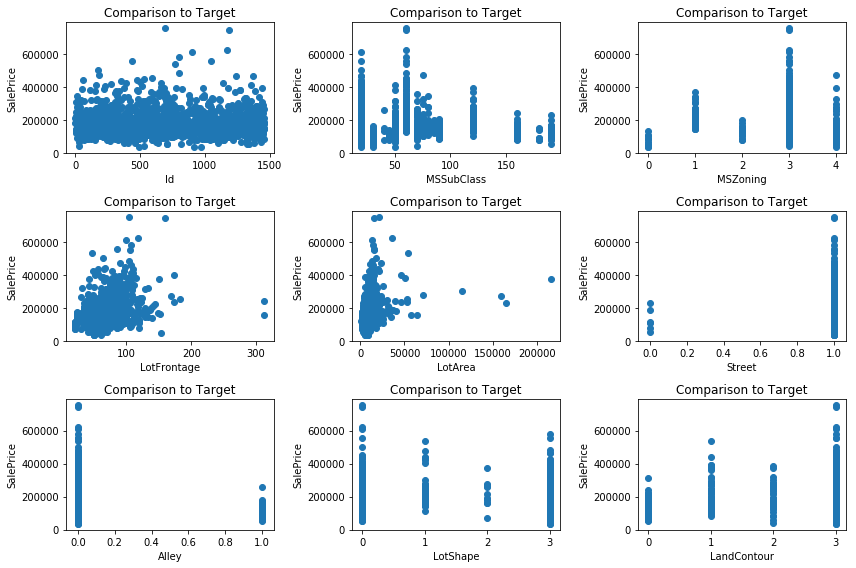

In [8]:
# Plot oneway graphs field versus target
j = 0 #select the starting field for the 9 plots
fig = plt.figure(figsize=(12,8))

# loop plotting
for i in range(9):
    field1 = data1.columns[j]
    oneway = data1[[field1,target]]
    plt.subplot(3,3,i+1)
    try:
        plt.scatter(oneway[field1],oneway[target])
    except:
        plt.scatter(0,0)
    plt.title("Comparison to Target")
    plt.xlabel(oneway.columns[0])
    plt.ylabel(oneway.columns[1])
    j=j+1

plt.tight_layout()
#plt.savefig("Images/Group9.png")
plt.show()

#### 3. Data Analyses

----
##### * Generalized Linear Model 


* Deviance

In [9]:
# Generalized Linear Model consistent with Ordinary least squares

#Initializing variables
dev_comp = pd.DataFrame()
fields = []
dev1 = []
dev2 = []

# Calculating Deviance
for i in range(80):
    
    # Deviance of Ln Sales Price
    form1 = "ln_SalePrice ~ " + data.columns[i]
    fields.append(data.columns[i])
    
    try:
        model_ols = glm(formula = form1, data = data,family = sm.families.Gaussian()).fit()
        dev1.append(model_ols.null_deviance - model_ols.deviance)
    except:
        dev1.append(0)
    
    # Deviance of Sales Price
    form1 = "SalePrice ~ " + data.columns[i]
    try:
        model_ols = glm(formula = form1, data = data,family = sm.families.Gaussian()).fit()
        dev2.append(model_ols.null_deviance - model_ols.deviance)
    except:
        dev2.append(0)
        
    dev_comp.append([data.columns[i], dev1])

# Output deviance measures and rank by decending
dev_comp["Fields"] = fields
dev_comp["Dev1"] = dev1
dev_comp["Dev2"] = dev2
dev_comp = dev_comp.sort_values(by="Dev1", ascending=False)
print(dev_comp)

           Fields        Dev1          Dev2
17    OverallQual  155.462039  5.760947e+12
12   Neighborhood  132.884425  5.023606e+12
46      GrLivArea  114.374538  4.623740e+12
61     GarageCars  107.844935  3.776385e+12
27      ExterQual  107.349496  4.395744e+12
53    KitchenQual  104.210816  4.204320e+12
62     GarageArea   98.627072  3.578809e+12
30       BsmtQual   96.017988  4.066554e+12
38    TotalBsmtSF   87.232270  3.466605e+12
49       FullBath   82.353698  2.894450e+12
19      YearBuilt   80.098477  2.517642e+12
20   YearRemodAdd   74.475776  2.367827e+12
29     Foundation   70.690176  2.360618e+12
54   TotRmsAbvGrd   66.489519  2.622969e+12
60   GarageFinish   64.417274  2.299993e+12
59    GarageYrBlt   58.304718  2.035564e+12
56     Fireplaces   55.769899  2.007532e+12
40      HeatingQC   54.362995  1.800151e+12
58     GarageType   53.616641  1.778186e+12
25     MasVnrType   44.551599  1.713827e+12
33   BsmtFinType1   43.720883  1.726056e+12
26     MasVnrArea   42.951032  2

In [10]:
# Show the average Sales Price by selected fields (i)
i= 17
d1 = data1.groupby(data1.columns[i])
d1["SalePrice"].mean()

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

#### * Modeling: Linear Models

In [11]:
# Create formula (form1) for use in linear models
a = data1.columns[4]
b = data1.columns[17]
c = data1.columns[20]
d = data1.columns[38]
e = data1.columns[46]

# Formula 1 construction and string verification of house features involved
form1 = "SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
form1

'SalePrice ~ LotArea + OverallQual + YearRemodAdd + TotalBsmtSF + GrLivArea'

    * Gaussian Model

In [12]:
# GLM consistent with Ordinary least squares
model_ols = glm(formula = form1, data = data1,family = sm.families.Gaussian()).fit()
print(model_ols.null_deviance - model_ols.deviance)
print(model_ols.summary())

6991790484001.785
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1454
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                      1.5242e+09
Method:                          IRLS   Log-Likelihood:                -17504.
Date:                Sat, 27 Jul 2019   Deviance:                   2.2161e+12
Time:                        09:46:32   Pearson chi2:                 2.22e+12
No. Iterations:                     3   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.054e+06   1.15e+05     -9.148      0.000   -1.28e+06   -8.28e+05
LotArea          0.6950     

    * Poisson Model

In [13]:
# GLM with Poisson family
model_glm = glm(formula = form1, data = data1, family = sm.families.Poisson()).fit()
print(model_glm.null_deviance - model_glm.deviance)
print(model_glm.null_deviance - model_ols.deviance)
print(model_glm.summary())

35587111.898215
-2216076228999.584
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1454
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.5274e+06
Date:                Sat, 27 Jul 2019   Deviance:                   9.0345e+06
Time:                        09:46:33   Pearson chi2:                 8.27e+06
No. Iterations:                     6   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.6252      0.008    478.903      0.000       3.610       3.640
LotArea    

    * Gamma Model

In [14]:
# GLM consistent with Ordinary least squares
model_glm = glm(formula = form1, data = data1, family = sm.families.Gamma(link = sm.families.links.log)).fit()
print(model_glm.null_deviance - model_glm.deviance)
print(model_glm.summary())

197.31349341634447
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1454
Model Family:                   Gamma   Df Model:                            5
Link Function:                    log   Scale:                        0.023940
Method:                          IRLS   Log-Likelihood:                -17041.
Date:                Sat, 27 Jul 2019   Deviance:                       41.443
Time:                        09:46:33   Pearson chi2:                     34.8
No. Iterations:                    17   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7055      0.456      8.117      0.000       2.811       4.600
LotArea       3.942e-06   4

----

Observing average Sales Price by Selected field (house feature)

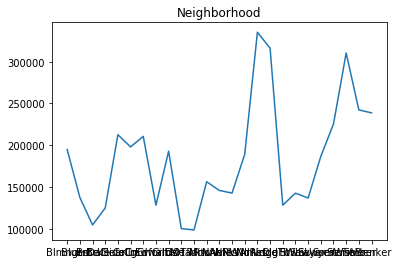

In [15]:
# Show the average target by selected fields (i)
i= 12
d1 = data.groupby(data.columns[i])
plt.plot(d1["SalePrice"].mean())
plt.title(data.columns[i])
plt.show()

#### 4. Predictive Model Construction
* Formula 1: Sales Price ~ LotArea + OverallQual + YearRemodAdd + TotalBsmtSF + GrLivArea + OverallCond

* Formula 2: Natural Log Sales Price ~ LotArea + OverallQual + YearRemodAdd + TotalBsmtSF + GrLivArea + OverallCond

In [16]:
# Create formula (form1) for use in linear models
a = data.columns[4]
b = data.columns[17]
c = data.columns[20]
d = data.columns[38]
e = data.columns[46]
f = data.columns[18]
g = data.columns[19]

form1 = "SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e + " + " + f 
form2 = "ln_SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e + " + " + f 
form2

'ln_SalePrice ~ LotArea + OverallQual + YearRemodAdd + TotalBsmtSF + GrLivArea + OverallCond'

In [17]:
# GLM consistent with Ordinary least squares
model_ols = glm(formula = form1, data = data, family = sm.families.Gaussian()).fit()
print(model_ols.summary())
model_ols_ln = glm(formula = form2, data = data, family = sm.families.Gaussian()).fit()
print(model_ols_ln.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1453
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                      1.5247e+09
Method:                          IRLS   Log-Likelihood:                -17504.
Date:                Sat, 27 Jul 2019   Deviance:                   2.2154e+12
Time:                        09:46:34   Pearson chi2:                 2.22e+12
No. Iterations:                     3   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.045e+06   1.16e+05     -9.026      0.000   -1.27e+06   -8.18e+05
LotArea          0.6913      0.109      6.349 

Diff1 min: -526,861.28
Diff1 max: 286,847.45
Diff2 min: -1,770,585.49
Diff2 max: 222,326.20


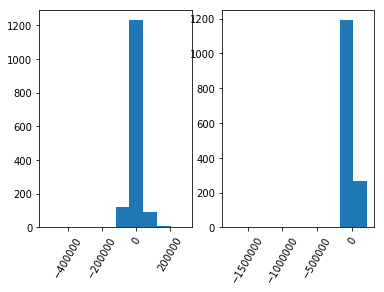

In [18]:
data["Pred1"] = model_ols.predict()
data["Diff1"] = data["SalePrice"] - data["Pred1"]
data["Pred2"] = np.exp(model_ols_ln.predict())
data["Diff2"] = data["SalePrice"] - data["Pred2"]
print("Diff1 min: " + "{:,.2f}".format(data["Diff1"].min()))
print("Diff1 max: " + "{:,.2f}".format(data["Diff1"].max()))
print("Diff2 min: " + "{:,.2f}".format(data["Diff2"].min()))
print("Diff2 max: " + "{:,.2f}".format(data["Diff2"].max()))

plt.subplot(1,2,1)
plt.hist(data["Diff1"])
plt.xticks(rotation = 60)
plt.subplot(1,2,2)
plt.hist(data["Diff2"])
plt.xticks(rotation = 60)
plt.show()

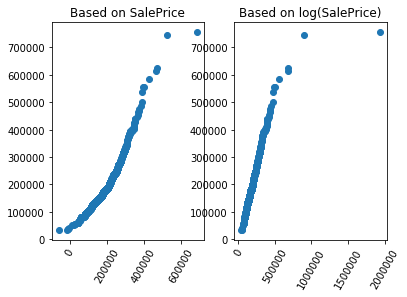

In [19]:
plt.subplot(1,2,1)
plt.scatter(np.sort(data["Pred1"]),np.sort(data["SalePrice"]))
plt.title("Based on SalePrice")
plt.xticks(rotation = 60)
plt.subplot(1,2,2)
plt.scatter(np.sort(data["Pred2"]),np.sort(data["SalePrice"]))
plt.title("Based on log(SalePrice)")
plt.xticks(rotation = 60)
plt.show()

# INCLUDE FOLLOWING IN 2. DATA MUNGNING SECTION

In [20]:


data_model = data[["LotArea", "OverallQual", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "Neighborhood", "BldgType",
                   "SalePrice", "Pred1", "Diff1", "Pred2","Diff2"]]
outliers = data_model[data_model["Diff2"] < -500000]
outliers

,LotArea,OverallQual,YearRemodAdd,TotalBsmtSF,GrLivArea,Neighborhood,BldgType,SalePrice,Pred1,Diff1,Pred2,Diff2
523,40094,10,2008,3138,4676,Edwards,1Fam,184750,526553.730897,-341803.730897,9.047496e+05,-7.199996e+05
1298,63887,10,2008,6110,5642,Edwards,1Fam,160000,686861.276386,-526861.276386,1.930585e+06,-1.770585e+06


In [21]:
test = data_model[(data_model["Neighborhood"] == 7) & (data_model["OverallQual"] > 7)]
test

,LotArea,OverallQual,YearRemodAdd,TotalBsmtSF,GrLivArea,Neighborhood,BldgType,SalePrice,Pred1,Diff1,Pred2,Diff2


In [22]:
stats.ttest_ind(data["SalePrice"],data["Pred1"], equal_var=False)
stats.ttest_ind(data["SalePrice"],data["Pred2"], equal_var=False)

Ttest_indResult(statistic=0.7070156876048105, pvalue=0.47961338356829464)

# ADD t stats
----


##### * Modeling with Feature Exclusion

In [23]:
form1 = "SalePrice ~ " + b + " + " + c + " + " + d + " + " + e + " + " + f
model_ols_a = glm(formula = form1, data = data, family = sm.families.Gaussian()).fit()
print("Difference of Deviance Excluding " + a + ": " + str(model_ols_a.deviance - model_ols.deviance))

Difference of Deviance Excluding LotArea: 61462466654.76318


In [24]:
form1 = "SalePrice ~ " + a + " + " + c + " + " + d + " + " + e + " + " + f
model_ols_b = glm(formula = form1, data = data, family = sm.families.Gaussian()).fit()
print("Difference of Deviance Excluding " + b + ": " + str(model_ols_b.deviance - model_ols.deviance))

Difference of Deviance Excluding OverallQual: 734570987435.7158


In [25]:
form1 = "SalePrice ~ " + a + " + " + b + " + " + d + " + " + e + " + " + f
model_ols_c = glm(formula = form1, data = data, family = sm.families.Gaussian()).fit()
print("Difference of Deviance Excluding " + c + ": " + str(model_ols_c.deviance - model_ols.deviance))

Difference of Deviance Excluding YearRemodAdd: 98146597806.50244


In [26]:
form1 = "SalePrice ~ " + a + " + " + b + " + " + c + " + " + e + " + " + f
model_ols_d = glm(formula = form1, data = data, family = sm.families.Gaussian()).fit()
print("Difference of Deviance Excluding " + d + ": " + str(model_ols_d.deviance - model_ols.deviance))

Difference of Deviance Excluding TotalBsmtSF: 196084282609.70996


In [27]:
form1 = "SalePrice ~ " + a + " + " + b + " + " + c + " + " + d + " + " + f
model_ols_e = glm(formula = form1, data = data, family = sm.families.Gaussian()).fit()
print("Difference of Deviance Excluding " + e + ": " + str(model_ols_e.deviance - model_ols.deviance))

Difference of Deviance Excluding GrLivArea: 532584325777.81934


In [28]:
form1 = "SalePrice ~ " + a + " + " + b + " + " + c + " + " + d + " + " + e
model_ols_f = glm(formula = form1, data = data, family = sm.families.Gaussian()).fit()
print("Difference of Deviance Excluding " + f + ": " + str(model_ols_f.deviance - model_ols.deviance))

Difference of Deviance Excluding OverallCond: 713309198.0751953



----

##### * OLS Bootstrapping



In [29]:
# Import data to convert text fields to categorical fields
data = pd.read_csv("train.csv")
getfields = data[["LotArea", "OverallQual", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "SalePrice" ]]
formodel["LotArea"] = getfields["LotArea"] /10000
formodel["OverallQual"] = getfields["OverallQual"]
formodel["YearRemodAdd"] = getfields["YearRemodAdd"] /100
formodel["TotalBsmtSF"] = getfields["TotalBsmtSF"] /1000
formodel["GrLivArea"] = getfields["GrLivArea"] /1000
formodel["SalePrice"] = getfields["SalePrice"] /10000
formodel["ln_SalePrice"] = np.log(getfields["SalePrice"] /10000)
formodel.describe()

NameError: name 'formodel' is not defined

In [30]:
# Create formula (form1) for use in linear models
a = formodel.columns[0]
b = formodel.columns[1]
c = formodel.columns[2]
d = formodel.columns[3]
e = formodel.columns[4]

form1 = "SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
form2 = "ln_SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
form2

NameError: name 'formodel' is not defined

In [31]:
# GLM consistent with Ordinary least squares --- sm.families.links.log
model_ols = smf.glm(formula = form1, data = formodel, family = sm.families.Gaussian(sm.families.links.log)).fit()
print(model_ols.summary())
ols_test = smf.ols(formula = form2, data = formodel).fit()
print(ols_test.summary())

NameError: name 'smf' is not defined

In [32]:
formodel["Pred1"] = model_ols.predict()
formodel["Pred2"] = np.exp(ols_test.predict())
min = 0
max = 80
plt.scatter(np.sort(formodel["Pred1"]),np.sort(formodel["SalePrice"]),color="blue",label="GLM - Log")
plt.scatter(np.sort(formodel["Pred2"]),np.sort(formodel["SalePrice"]),color="red",label="OLS - Log")
plt.legend()
plt.plot([0,max],[0,max])

plt.axis("equal")
plt.title("Q-Q Plot")
plt.xticks(rotation = 60)
plt.xlim(min,max)
plt.ylim(min,max)

plt.show()

NameError: name 'formodel' is not defined

In [33]:
formodel["Pred1"] = model_ols.predict()
formodel["Pred2"] = np.exp(ols_test.predict())
min = 0
max = 80
plt.scatter(np.sort(formodel["Pred1"]),np.sort(formodel["SalePrice"]),color="blue",label="GLM - Log")
plt.scatter(np.sort(formodel["Pred2"]),np.sort(formodel["SalePrice"]),color="red",label="OLS - Log")
plt.legend()
plt.plot([0,max],[0,max])

plt.axis("equal")
plt.title("Q-Q Plot")
plt.xticks(rotation = 60)
plt.xlim(min,max)
plt.ylim(min,max)

plt.show()

NameError: name 'formodel' is not defined

In [34]:
num_samples = 1000
glm_params = np.zeros((num_samples,6),dtype=float)
sample_rows = len(formodel["SalePrice"])

for i in range(num_samples):
    seed = 12345 + i
    sampled = formodel.sample(n=sample_rows,replace = True, random_state = seed)
    model_ols = smf.glm(formula = form1, data = sampled, family = sm.families.Gaussian(sm.families.links.log)).fit()
    for j in range(6):
        glm_params[i,j] = model_ols.params[j]
df_boot = pd.DataFrame(glm_params)
df_boot.columns = ["Intercept", a, b, c, d, e]
#df_boot.head()

NameError: name 'formodel' is not defined

In [35]:
df_boot.describe()

NameError: name 'df_boot' is not defined